In [181]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [182]:
nlp = spacy.load('en_core_web_md')

In [183]:
def cos_sim(a,b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [293]:

words = ['badminton', 'soccer','football','tennis','basketball','volleyball','golf','bowling']

embs =[]
for word in words:
    doc = nlp(word)
    
    embs.append(doc[0].vector)

df = pd.DataFrame(embs)
df['y'] = 1

df

words_n = ['rice', 'food','ramen','sushi','schnitzel','bread','steak','soup','curry','ham']
embs_n =[]
for word in words_n:
    doc = nlp(word)
    
    embs_n.append(doc[0].vector)

df_n = pd.DataFrame(embs_n)
df_n['y'] = 0

df_n
df = pd.concat([df,df_n])
df.index = words + words_n

logreg = LogisticRegression()

logreg.fit(dat.drop('y',axis=1), dat['y'])


LogisticRegression()

In [443]:
w = 'food'
d = nlp(w)
predword = d.vector.reshape(1,-1) 
print(logreg.predict_proba(predword))
'sport' if logreg.predict(predword)[0] else 'food'

[[0.96963595 0.03036405]]


'food'

In [295]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [413]:
scale = StandardScaler()

df_scale = scale.fit_transform(df.drop('y', axis=1))

pca = PCA()

pca_fitted = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(pca_fitted, index = df.index, columns=labels)


Prediction: food


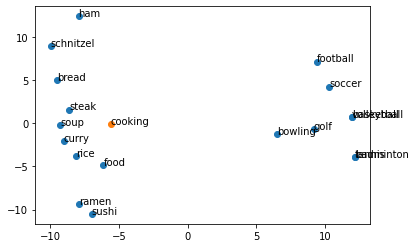

In [462]:
# PLOT WORD PCA
pca_df = pd.DataFrame(pca_fitted, index = df.index, columns=labels)

w = 'cooking'
d = nlp(w)
d_pca = pca.transform(scale.transform(d.vector.reshape(1,-1)))
plt.scatter(pca_df['PC1'], pca_df['PC2'])



for sample in pca_df.index:
    plt.annotate(sample, (pca_df['PC1'].loc[sample],pca_df['PC2'].loc[sample]))
    
plt.scatter(d_pca[0][0], d_pca[0][1])
plt.annotate(w, (d_pca[0][0], d_pca[0][1]))

predword = d.vector.reshape(1,-1) 
print(f"Prediction: {'sport' if logreg.predict(predword)[0] else 'food'}")